In [198]:
 import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [199]:
movies_df = pd.read_csv('machine learning.csv')
movies_df.head()

,imdb_title_id,original_title,year,genre,country,production_company,duration,votes,budget,usa_gross_income,worldwide_gross_income,rating,metascore
0,tt7374952,Chicano,2018,Drama,USA,Films,108,1016,8000000,1400603,1404646,5.3,46
1,tt0238247,Army,2000,Drama,USA,Films,108,1021,300000,2637726,2637726,6.4,38
2,tt0462579,Treatment,2006,Romance,USA,Shrinkwrap,86,1037,900000,83354,83354,5.8,54
3,tt2094890,George,2013,Drama,USA,Productions,107,1037,750000,157937,157937,6.4,77
4,tt6512428,Indivisible,2018,War,USA,Films,119,1038,2700000,3511417,3589633,5.8,53


In [200]:
# X = movies_df[["duration", "votes", "rating", "metascore", "budget"]]
# y = movies_df["worldwide_gross_income"].values.reshape(-1, 1)
# print(X.shape, y.shape)

X = movies_df[["duration", "votes", "worldwide_gross_income", "metascore", "budget"]]
y = movies_df["rating"].values.reshape(-1, 1)
print(X.shape, y.shape)

(4031, 5) (4031, 1)


In [201]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,duration,votes,worldwide_gross_income,metascore,budget
2086,86,47108,2437000,75,777000
1422,118,25417,201890,62,6000000
296,104,4626,10372291,34,90000000
2401,112,62370,44567606,62,10000000
507,105,7718,342202,60,4000000


In [202]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [203]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

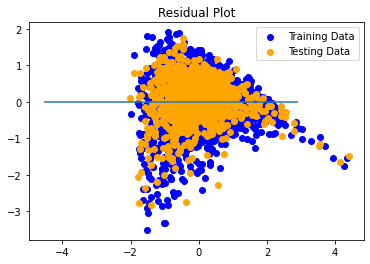

In [204]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

plt.scatter(model.predict(X_train_scaled), y_train_scaled - model.predict(X_train_scaled), c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), y_test_scaled - model.predict(X_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [210]:
training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)
    
print(f"Training Data Score: {training_score}")
print(f"Testing Data Score: {testing_score}")

Training Data Score: 0.6134451034640581
Testing Data Score: 0.6428990143569557


In [205]:
 from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.3499942139627913, R2: 0.6428990143569557


In [208]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.3495246799742346, R2: 0.6433780824198475


In [207]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.34962871177912414, R2: 0.6432719382077943


In [209]:
model.score(X_test_scaled,y_test_scaled)

0.6428990143569557